# 2.3. Support Vector Machines

>## <ins>Table of contents</ins>
>* [**2.3.1. Grundlagen**](#Grundlagen)
    * [****](#lr)
    * [****](#L_logit)
>* [**2.3.2. Nicht-linear-separierbare Daten**](#nl_daten)
>* [**2.2.6. Zusammenfassung**](#zusammenfassung)
>*  * [**Für einen 2D-Modell**](#2d)
    * [**Für einen 3D-Modell**](#3d)
>   * [**Mehklassenklassifikation**](#mkk)

## Imports

In [70]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## 2.3.1. Grundlagen <a name="Grundlagen"></a>

- **Support Vector Machine (SVM)** ist eind häufig verwendete Methode zur Klassifikatio
n.
- Die Kernidee von SVMs ist die Bestimmung einer Hyperebene im Merkmalsraum, die die Beispiele der verschiedenen Klassen voneinander trenn>
- Im 2-dimensionalen Raum sind Hyperebenen einfache Geraden.
- Die Klassifikationsgrenzen des logistischen Modells entsprechen diesen separierenden Hyperebenen.
- Bei der logistischen Regression werden die Klassifikationsgrenzen nur implizit berechnet und der Lernalgorithmus basiert auf der Minimierung der logistischen Kostenfun on.
- Im Gegensatz dazu wird bei der SVM die Klassifikationsgrenze explizit gelernt.
- Bei binärer Klassifikation wird die Hyperebene gesucht, die die beiden Klassen voneinander trennt und dabei den größtmöglichen Abstand zu den Beispielen der beiden Klassen hat.

> Eine Hyperebene in einem n-dimensionalen Raum (Rn) ist ein Unterraum mit einer Dimension weniger als der umgebende Raum. In diesem Fall ist die Hyperebene definiert durch die Gleichung: $$h_{SVM_{\theta,b}} : \theta^T x - b = 0$$
> Hierbei ist: $\theta$ ein Vektor in Rn, $b$ ein Skalar in R, $x$ ein Punkt in Rn, und $\theta^T x$ das Skalarprodukt von $\theta$ und $x$.
> Die Hyperebene besteht aus allen Punkten $x$ in Rn, die diese Gleichung erfüllen.
> In der Kontext von Support Vector Machines (SVMs) repräsentiert diese Hyperebene die Entscheidungsgrenze des Klassifikators. Die Parameter $\theta$ und $b$ werden während des Trainings der SVM gelernt.


#### Beispiel:
Wir erklären hier eine Methode zur Klassifizierung von Äpfeln basierend auf ihrem Durchmesser und Gewicht, die auf Support Vector Machines (SVMs) basiert. Wir definieren dazu zwei Hyperebenen, die durch die folgenden Gleichungen gegeben sind:

- $$h1 = h_{SVM_{(-0.9,-1),-140}} : -0.9x_1 -x_2 +140 = 0$$
- $$h2 = h_{SVM_{(-0.3,-1),-106}} : -0.3x_1 -x_2 +106 = 0$$

Die Klassifikation eines neuen Beispiels $x$ erfolgt durch die Berechnung, auf welcher Seite der Hyperebene $h_{SVM_{\theta,b}}$ sich $x$ befindet und die entsprechende Klasse ausgibt. Die Klassifikationsfunktion $clf_{\theta,b}(x)$ ist also wie folgt definiert:

$$
clf_{\theta,b}(x) = \begin{cases}
   1 &\text{falls } \theta^T x - b ≥ 0 \\
   0 &\text{falls } \theta^T x - b < 0
\end{cases}
$$


Diese Funktion gibt `1` aus, wenn der Punkt $x$ auf einer Seite der Hyperebene liegt (was wir als "ok" interpretieren könnten), und `0`, wenn er auf der anderen Seite liegt (was wir als "nicht ok" interpretieren könnten). 
> Die genaue Interpretation hängt von der Art und Weise ab, wie Sie Ihre Daten kodiert und Ihre SVM trainiert haben. Es ist wichtig zu beachten, dass die Wahl der Parameter $\theta$ und $b$ (die die Orientierung und Position der Hyperebene bestimmen) durch das Training der SVM bestimmt wird, basierend auf den Trainingsdaten und den zugehörigen Klassenlabels.

In [113]:
D_fruits = pd.read_csv("./uebung_2_3/sl_svm_ex_fruits.csv")
D_fruits

,diameter,weight,ok
0,61,92,1
1,58,93,1
2,58,87,0
3,60,91,1
4,61,89,1
5,56,86,0
6,57,88,0
7,58,92,1
8,57,85,0
9,59,92,1


In [114]:
# Trennen Sie die Merkmale und die Zielvariable
X = D_fruits.iloc[:, 0:-1].values
y = D_fruits.iloc[:, 2].values

Wenn Sie `levels=0` setzen, wird nur die **Entscheidungsgrenze** gezeichnet. Wenn Sie `levels=[-1,0,1]` setzen, werden **die Entscheidungsgrenze und die Margen** gezeichnet¹.

<Figure size 640x480 with 0 Axes>

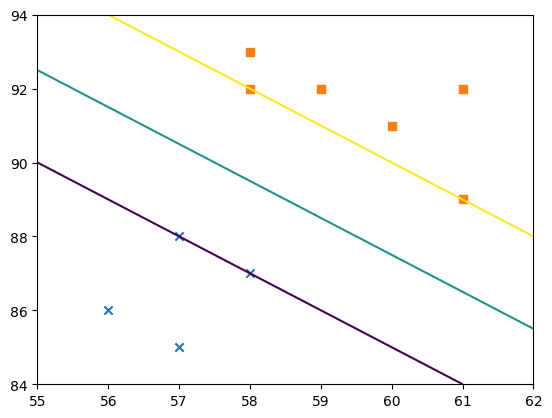

In [115]:
# Erstellen Sie das SVM-Modell und Trainieren ihn
clf =  SVC(kernel='linear').fit(X, y)

#Predict the response for test dataset
y_pred = clf.predict(X)

plt.figure()
DecisionBoundaryDisplay.from_estimator(clf,X,plot_method="contour",levels=[-1,0,1])

plt.scatter(D_fruits[y==0]["diameter"], D_fruits[y==0]["weight"], marker='x')
plt.scatter(D_fruits[y==1]["diameter"], D_fruits[y==1]["weight"], marker='s')
plt.show()

Um die Parameter für den `DecisionBoundaryDisplay`-Aufruf zu finden, können Sie die Attribute des trainierten Klassifikators (`clf` in Ihrem Code) verwenden. Insbesondere die Attribute `clf.coef_` und `clf.intercept_` repräsentieren die Koeffizienten der Entscheidungsfunktion und den y-Achsenabschnitt der Entscheidungsgrenze¹.

In [116]:
# Die Parameter theta und b
theta = clf.coef_
b = clf.intercept_

print("Theta ist "+str(theta)+" und b ist "+str(b))
print("--> Die Optimierungsfunktion h_opt: "+str(round(theta[0][0],1))+"x1 + "
      +str(round(theta[0][0],1))+"x2 "
      +str(round(b[0],1))+" = 0")

Theta ist [[0.39996947 0.40012212]] und b ist [-59.00908304]
--> Die Optimierungsfunktion h_opt: 0.4x1 + 0.4x2 -59.0 = 0


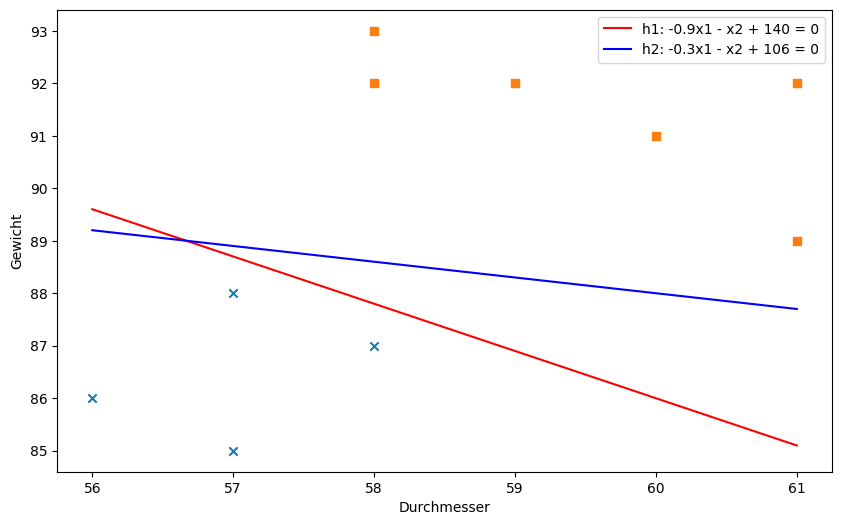

In [119]:
# Erstellen Sie eine Funktion für jede Gerade
def h(a,b,x):
    return a*x + b


# Erstellen Sie ein Array von x-Werten für die Geraden
x = np.linspace(X[:,0].min(), X[:,0].max(), 100)

h1 = h(-0.9, 140, x)
h2 = h(-0.3, 106, x)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(D_fruits[y==0]["diameter"], D_fruits[y==0]["weight"], marker='x')
plt.scatter(D_fruits[y==1]["diameter"], D_fruits[y==1]["weight"], marker='s')
plt.plot(x, h1, '-r', label='h1: -0.9x1 - x2 + 140 = 0')
plt.plot(x, h2, '-b', label='h2: -0.3x1 - x2 + 106 = 0')
plt.xlabel('Durchmesser')
plt.ylabel('Gewicht')
plt.legend()
plt.show()


Bei der binären Klassifikation mit Support-Vektor-Maschinen (SVMs) suchen wir nach einer Hyperebene, die die Datenpunkte der beiden Klassen trennt. Diese Hyperebene wird so gewählt, dass sie den Abstand zu den nächstgelegenen Datenpunkten jeder Klasse maximiert. Dies wird als Maximierung des Margins bezeichnet.

Die Hyperebene wird durch die Gleichung $$\theta^T x - b = 0$$ definiert, wobei $\theta$ der Normalenvektor der Hyperebene ist und $b$ den Abstand vom Ursprung bestimmt. Die optimalen Parameter $\theta$ und $b$ werden durch die Lösung des gegebenen Minimierungsproblems bestimmt.

Die Bedingungen $\theta^T x - b \geq 1$ für alle $(x,1) \in D$ und $$\theta^T x - b \leq -1$$ für alle $(x,0) \in D$ stellen sicher, dass alle Datenpunkte korrekt klassifiziert werden und auf der richtigen Seite der Hyperebene liegen. In der Praxis benennt man die beiden Klassen in der binären Klassifikation mit SVMs üblicherweise als 1 und -1 anstelle von 1 und 0, um die mathematische Behandlung zu vereinfachen.

In [77]:
print("Accuracy:", accuracy_score(y, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", precision_score(y, y_pred, zero_division=0))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", recall_score(y, y_pred, zero_division=0))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


<Figure size 640x480 with 0 Axes>

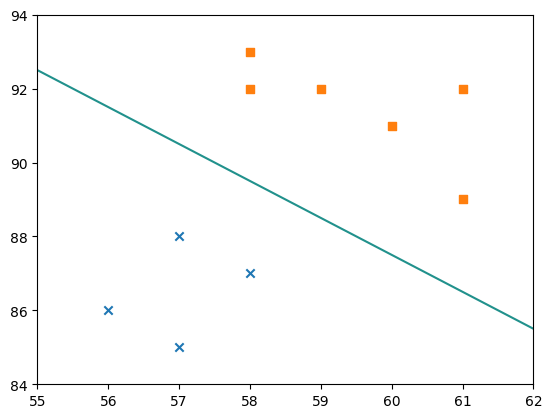

In [75]:
plt.figure()
DecisionBoundaryDisplay.from_estimator(clf,X,plot_method="contour",levels=0)

plt.scatter(D_fruits[y==0]["diameter"], D_fruits[y==0]["weight"], marker='x')
plt.scatter(D_fruits[y==1]["diameter"], D_fruits[y==1]["weight"], marker='s')
plt.show()

Die SVMs versuchen, eine Hyperebene zu finden, die die Datenpunkte zweier Klassen optimal trennt. Bei linear separierbaren Daten <isn> wird die Hyperebene so gewählt, dass sie den Abstand (auch als **Margin** bezeichnet) zu den nächstgelegenen Datenpunkten jeder Klasse maximiert</isn>. Diese nächstgelegenen Punkte werden als **Support Vektoren** bezeichnet.

Das Optimierungsproblem, das gelöst werden muss, um die Parameter der Hyperebene zu finden, ist in Ihrem Text angegeben. Es handelt sich um ein quadratisches Optimierungsproblem, bei dem die Norm des Gewichtsvektors minimiert wird, unter der Bedingung, dass alle Datenpunkte korrekt klassifiziert werden. In der binären Klassifikation mit SVMs werden die Klassen üblicherweise als 1 und -1 bezeichnet, anstatt als 1 und 0. Dies erleichtert die mathematische Formulierung des SVM-Algorithmus.

In [ ]:
def svm_funktion(coef, intercept, z1, z2):
    print("Das Optimal angepasstes logistisches Regressionsmodell:\nf(z) = 1 / (1 + e^-("+str(intercept)+" + "+str(coef[0])+" z1 + "+str(coef[1])+" z2))")
    return 1 / (1 + np.exp(-intercept - coef[0]*z1 - coef[1]*z2))


# Berechnen Sie die Sigmoid-Werte für die z-Werte
y_pred_class0 = logistische_funktion(clf.coef_[0], clf.intercept_, x1, x2)
print(y_pred_class0)

y_pred_class1 = 1 - y_pred_class0
print(y_pred_class1)

## 2.3.2. Nicht-linear-separierbare Daten <a name="nl_daten"></a>


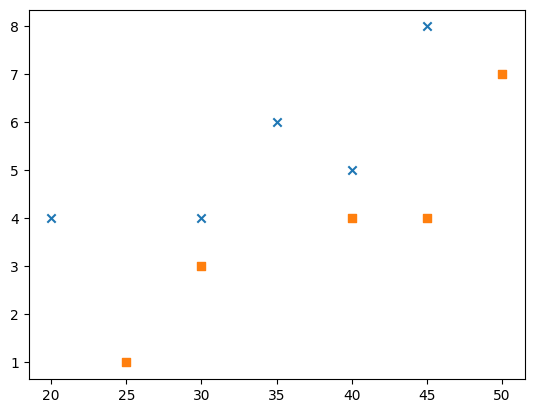

In [51]:
df = pd.read_csv("./uebung_2_3/sl_logreg_ex_apartment.csv")

X = df.iloc[:, 0:-1].values
y = df.iloc[:, 2].values

plt.figure()
plt.scatter(df[y==0]["size"], df[y==0]["dist"], marker='x')
plt.scatter(df[y==1]["size"], df[y==1]["dist"], marker='s')
plt.show()

<Figure size 640x480 with 0 Axes>

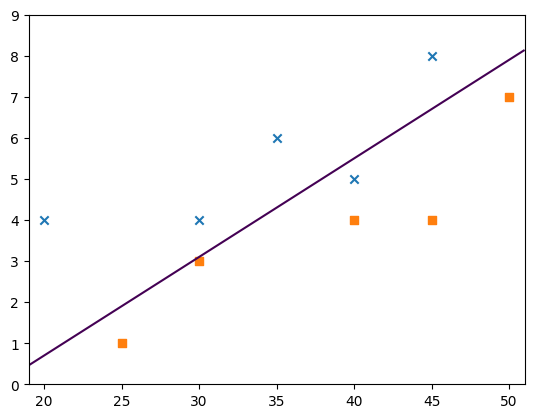

In [52]:
clf = SVC(kernel='linear',C=1).fit(X, y)

plt.figure()
DecisionBoundaryDisplay.from_estimator(clf,X,plot_method="contour",levels=[0])

plt.scatter(df[y==0]["size"], df[y==0]["dist"], marker='x')
plt.scatter(df[y==1]["size"], df[y==1]["dist"], marker='s')
plt.show()

### hier ist wie man eine gerade machen kann

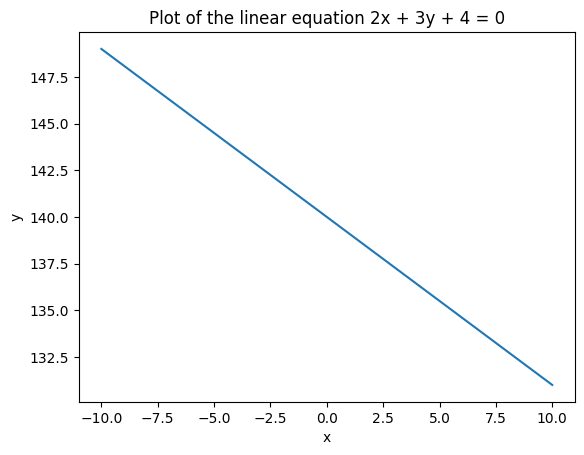

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of x values
x1 = np.linspace(-10, 10, 400)

# Define the equation
x2 = -(-0.9*x1 + 140) / -1

def h(a,b,c,x1,x2):
    return a*x1 + b*x2 + c

h1 = h(-0.9, -1, 140, D_fruits['diameter'], D_fruits['weight'])
h2 = h(-0.3, -1, 106, D_fruits['diameter'], D_fruits['weight'])

# Create the plot
plt.plot(x1, x2)

# Add title and labels
plt.title('Plot of the linear equation 2x + 3y + 4 = 0')
plt.xlabel('x')
plt.ylabel('y')

# Display the plot
plt.show()
